In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('brown')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
tweets = pd.read_csv('Trump.csv')['Content']

In [4]:
tweets

0     【Popular No.1 Topics in United States of Ameri...
1     #Facebook When You Are Done Suspending #US #Do...
2     @ihatecodee BUY and Sell #Bitcoin on #Burency_...
3     @KlausLovgreen Trade on the #burency_exchange ...
4     @TheMoonCarl Trade #Bitcoin  on #Burency_excha...
5     #politics NEW LINKS TO REMOVING TRUMP #Donald_...
6     #politics More LINKS TO REMOVING TRUMP #Donald...
7     #Donald_Trump \r\n\r\nI demand Human Rights in...
8     @amhfarraj \r\n\r\n@obai1d \r\n\r\nI trust you...
9     #politics LINKS TO REMOVING TRUMP #Donald_Trum...
10    Every #Social_Media Platform #Donald_Trump is ...
11    Donald Trump 24/7 Live Music, Chillout Music \...
12    I support the president #donald_trump \r\n\r\n...
13    Who's biggest extremist \r\n#Kapil_mishra \r\n...
14    The president's new account\r\n#Trumb\r\n#Dona...
15    #Twitter has permanently #suspended the #accou...
16    Twitter has decided to permanently ban #Donald...
17    China🇨🇳 has state-run media \r\nthe USA🇺🇸 

In [5]:
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    return tweet

In [6]:
tweets = tweets.map(lambda x: clean_tweets(x))

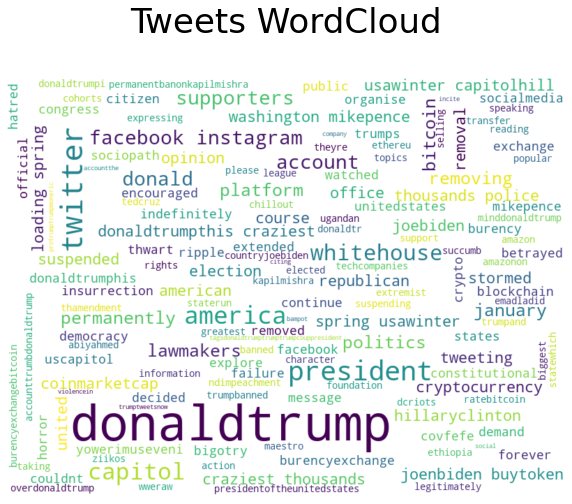

In [7]:
Data=' '.join(tweets.values)
stops=['the','and','that','for','with','this','for','was','you','about']
tokens =[word.lower() for word in Data.split() if len(word)>5 and word.lower() not in stops ]
Data=' '.join(tokens)


wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white",width=800, height=600).generate(Data)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Tweets WordCloud\n', fontsize=34)
plt.show()

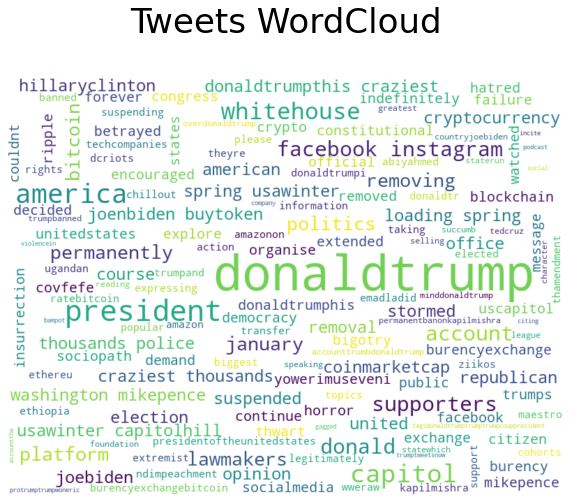

In [8]:
Data=' '.join(tweets.values)
stops=['the','and','that','for','with','this','for','was','you','about', 'twitter', 'tweeting']
tokens =[word.lower() for word in Data.split() if len(word)>5 and word.lower() not in stops ]
Data=' '.join(tokens)


wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white",width=800, height=600).generate(Data)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Tweets WordCloud\n', fontsize=34)
plt.show()

In [9]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
stops = stopwords.words('english')

In [11]:
stops.extend(['twitter','tweeting'])

In [12]:
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
[WordNetLemmatizer().lemmatize(w) for w in word_tokenize(tweets[0]) if w not in stops]

['Popular',
 'No',
 'Topics',
 'United',
 'States',
 'America',
 'DonaldTrump',
 'WWERaw',
 'PresidentoftheUnitedStates',
 'Why',
 'WWE',
 'hasnt',
 'talke']

In [14]:
tweets = tweets.map(lambda x: ' '.join([WordNetLemmatizer().lemmatize(w) for w in word_tokenize(x) if w not in stops]))

In [15]:
vader_analyzer = SentimentIntensityAnalyzer()

In [16]:
vader_analyzer.polarity_scores(tweets[26])

{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.3412}

In [17]:
dic = {'neg': 'Negative', 'neu': 'Neutral', 'pos': 'Positive', 'compound': 'Compound'}
def Analyzer(tweet):
    scores = vader_analyzer.polarity_scores(tweet)
    max_key = max(scores, key=lambda k: scores[k])
    return dic[max_key]#, scores[max_key]


In [18]:
tweets.map(lambda x : Analyzer(x))[:5]

0     Neutral
1    Compound
2     Neutral
3     Neutral
4     Neutral
Name: Content, dtype: object

In [19]:
tweets = tweets.to_frame()

In [20]:
tweets['Sentiment'] = tweets['Content'].map(lambda x : Analyzer(x))

In [21]:
tweets.head()

,Content,Sentiment
0,Popular No Topics United States America Donald...,Neutral
1,Facebook When You Are Done Suspending US Donal...,Compound
2,BUY Sell Bitcoin Burencyexchange Facts Fees lo...,Neutral
3,Trade burencyexchange Bitcoin DV Bitcoin News ...,Neutral
4,Trade Bitcoin BurencyexchangeBitcoin News Joen...,Neutral


In [22]:
tweets['Sentiment'].unique().tolist()

['Neutral', 'Compound', 'Positive', 'Negative']

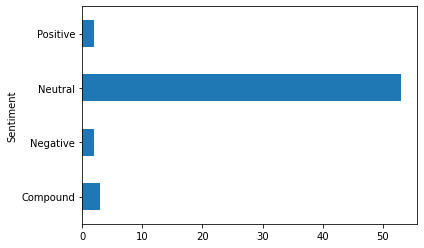

In [23]:
tweets.groupby('Sentiment').size().plot(kind='barh');

In [24]:
tweets.groupby('Sentiment').count()

,Content
Sentiment,
Compound,3
Negative,2
Neutral,53
Positive,2
